In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


import matplotlib.pyplot as plt
import numpy as np


from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%matplotlib inline

# Load the data

In [2]:

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# Explore

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

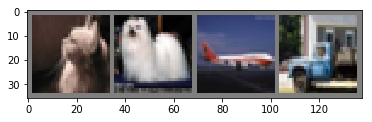

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [5]:
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

  cat   dog plane truck


# Define model

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Choose loss function & Optimizer

In [7]:
net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the model

In [8]:
for epoch in range(5):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data

        inputs, labels = Variable(inputs), Variable(labels)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.192
[1,  4000] loss: 1.862
[1,  6000] loss: 1.685
[1,  8000] loss: 1.592
[1, 10000] loss: 1.523
[1, 12000] loss: 1.484
[2,  2000] loss: 1.437
[2,  4000] loss: 1.403
[2,  6000] loss: 1.396
[2,  8000] loss: 1.331
[2, 10000] loss: 1.327
[2, 12000] loss: 1.335
[3,  2000] loss: 1.268
[3,  4000] loss: 1.255
[3,  6000] loss: 1.260
[3,  8000] loss: 1.247
[3, 10000] loss: 1.224
[3, 12000] loss: 1.229
[4,  2000] loss: 1.147
[4,  4000] loss: 1.167
[4,  6000] loss: 1.167
[4,  8000] loss: 1.171
[4, 10000] loss: 1.166
[4, 12000] loss: 1.143
[5,  2000] loss: 1.101
[5,  4000] loss: 1.080
[5,  6000] loss: 1.115
[5,  8000] loss: 1.093
[5, 10000] loss: 1.097
[5, 12000] loss: 1.089
Finished Training


# Test the network

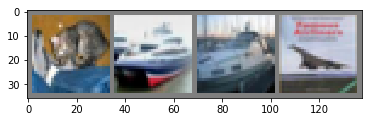

In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [10]:
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

GroundTruth:    cat  ship  ship plane


In [11]:
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship truck  ship


# Evaluate the whole model

In [12]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 61 %
Accuracy of  bird : 29 %
Accuracy of   cat : 36 %
Accuracy of  deer : 48 %
Accuracy of   dog : 66 %
Accuracy of  frog : 66 %
Accuracy of horse : 66 %
Accuracy of  ship : 64 %
Accuracy of truck : 74 %
